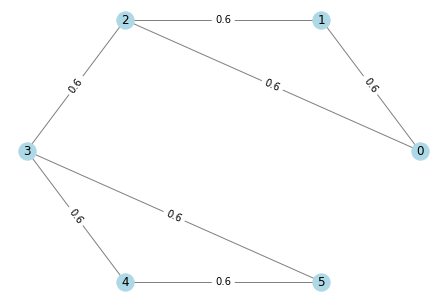

tensor(5.0400)
[[ 1.2       -0.6       -0.6       -0.        -0.        -0.       ]
 [-0.6        1.2       -0.6       -0.        -0.        -0.       ]
 [-0.6       -0.6        1.8000001 -0.6       -0.        -0.       ]
 [-0.        -0.        -0.6        1.8000001 -0.6       -0.6      ]
 [-0.        -0.        -0.        -0.6        1.2       -0.6      ]
 [-0.        -0.        -0.        -0.6       -0.6        1.2      ]]


In [1]:
from GEM_module import GEM
from utils import *
from scipy.sparse.csgraph import laplacian

# seed
torch.manual_seed(42)
torch.random.manual_seed(42)

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# generate synthetic data
edges = [[0,1],[0,2],[1,2],[2,3],[3,4],[4,5],[3,5]]
edges = torch.tensor(edges)
weights = torch.tensor([0.6]*len(edges))
num_nodes = 6
adj = generate_graph_from_edges(num_nodes, edges, weights)
print(adj.norm()**2)
L = laplacian(adj, normed=False)
print(L)
# generate data
sigma = 0.4
mu = sigma ** 2
n = 128
y = generate_y(num_nodes, sigma, L, n)

# 6-node graph experiments - PGD (w/o BCD)
Settings: All random seed 42. 128 data points. Generating noise $\sigma=0.4$ (variance 0.16).

Testing parameters:
- GLR strength: $\mu=0.2, 0.1, 0.4$ (suitable, low, high)
- PGD step size $\eta=0.01, 0.02$ combined with iterations $N=100, 50$
- Sparsity control $\gamma=0.4, 0.2, 0.6$



Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/50, ||S_new - S||_F = 0.0618
PGD iter 11/50, ||S_new - S||_F = 0.0595
PGD iter 21/50, ||S_new - S||_F = 0.0568
PGD iter 31/50, ||S_new - S||_F = 0.0533
PGD iter 41/50, ||S_new - S||_F = 0.0490
tensor([[0.0000, 0.6742, 0.5601, 0.5271, 0.3673, 0.5085],
        [0.6742, 0.0000, 0.4067, 0.3439, 0.3581, 0.4582],
        [0.5601, 0.4067, 0.0000, 0.6058, 0.6195, 0.5443],
        [0.5271, 0.3439, 0.6058, 0.0000, 0.5782, 0.6434],
        [0.3673, 0.3581, 0.6195, 0.5782, 0.0000, 0.5024],
        [0.5085, 0.4582, 0.5443, 0.6434, 0.5024, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.3364, grad_fn=<PowBackward0>)


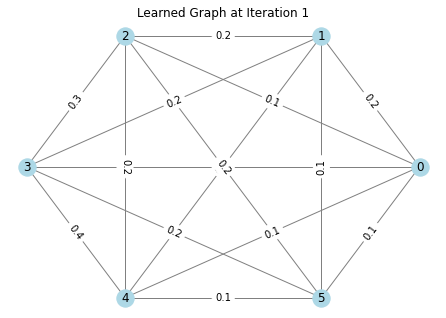

Iteration 2/5
after E-step: delta_W norm 0.1639, GLR 7.5846, adj norm^2 7.1477
after M-step-1: delta_W norm 0.0665, GLR 9.3014, adj norm^2 6.6080
PGD iter 1/50, ||S_new - S||_F = 0.0865
PGD iter 11/50, ||S_new - S||_F = 0.0834
PGD iter 21/50, ||S_new - S||_F = 0.0792
PGD iter 31/50, ||S_new - S||_F = 0.0732
PGD iter 41/50, ||S_new - S||_F = 0.0644
tensor([[0.0000, 0.5329, 0.5673, 0.2356, 0.0632, 0.2242],
        [0.5329, 0.0000, 0.2440, 0.1882, 0.4433, 0.0012],
        [0.5673, 0.2440, 0.0000, 0.4297, 0.3122, 0.4869],
        [0.2356, 0.1882, 0.4297, 0.0000, 0.6211, 0.2317],
        [0.0632, 0.4433, 0.3122, 0.6211, 0.0000, 0.6792],
        [0.2242, 0.0012, 0.4869, 0.2317, 0.6792, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.4552, grad_fn=<PowBackward0>)


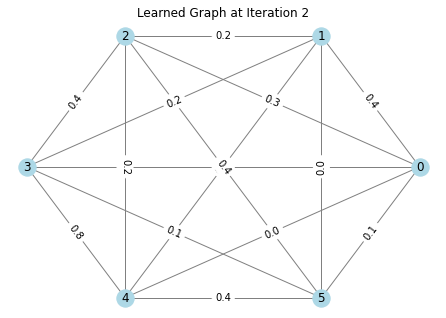

Iteration 3/5
after E-step: delta_W norm 0.0509, GLR 7.6068, adj norm^2 7.0043
after M-step-1: delta_W norm 0.1232, GLR 7.6466, adj norm^2 7.1917
PGD iter 1/50, ||S_new - S||_F = 0.1266
PGD iter 11/50, ||S_new - S||_F = 0.1216
PGD iter 21/50, ||S_new - S||_F = 0.1126
PGD iter 31/50, ||S_new - S||_F = 0.0824
PGD iter 41/50, ||S_new - S||_F = 0.0461
tensor([[0.0000, 0.3733, 0.4750, 0.0737, -0.0000, -0.0000],
        [0.3733, 0.0000, 0.2451, 0.0414, 0.0000, -0.0000],
        [0.4750, 0.2451, 0.0000, 0.3748, 0.4831, 0.1597],
        [0.0737, 0.0414, 0.3748, 0.0000, 0.6121, 0.6658],
        [-0.0000, 0.0000, 0.4831, 0.6121, 0.0000, 0.5027],
        [-0.0000, -0.0000, 0.1597, 0.6658, 0.5027, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.7161, grad_fn=<PowBackward0>)


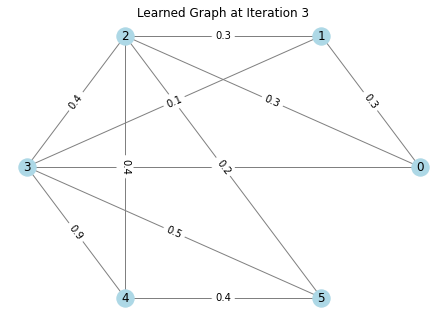

Iteration 4/5
after E-step: delta_W norm 0.1104, GLR 4.8854, adj norm^2 6.7556
after M-step-1: delta_W norm 0.1260, GLR 5.2602, adj norm^2 6.1202
PGD iter 1/50, ||S_new - S||_F = 0.1611
PGD iter 11/50, ||S_new - S||_F = 0.1539
PGD iter 21/50, ||S_new - S||_F = 0.1256
PGD iter 31/50, ||S_new - S||_F = 0.0745
PGD iter 41/50, ||S_new - S||_F = 0.0373
tensor([[0.0000, 0.4369, 0.3729, 0.1555, 0.0033, -0.0000],
        [0.4369, 0.0000, 0.1451, 0.0170, 0.0000, 0.0000],
        [0.3729, 0.1451, 0.0000, 0.2340, 0.0399, 0.0514],
        [0.1555, 0.0170, 0.2340, 0.0000, 0.2796, 0.6792],
        [0.0033, 0.0000, 0.0399, 0.2796, 0.0000, 0.6958],
        [-0.0000, 0.0000, 0.0514, 0.6792, 0.6958, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(2.6190, grad_fn=<PowBackward0>)


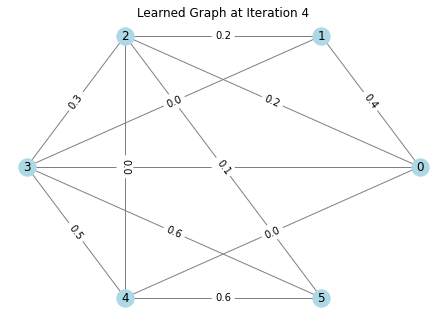

Iteration 5/5
after E-step: delta_W norm 0.1411, GLR 5.8335, adj norm^2 6.6309
after M-step-1: delta_W norm 0.0546, GLR 5.1835, adj norm^2 6.4711
PGD iter 1/50, ||S_new - S||_F = 0.1852
PGD iter 11/50, ||S_new - S||_F = 0.1775
PGD iter 21/50, ||S_new - S||_F = 0.1361
PGD iter 31/50, ||S_new - S||_F = 0.0573
PGD iter 41/50, ||S_new - S||_F = 0.0270
tensor([[0.0000, 0.4406, 0.4020, 0.0000, 0.0000, -0.0000],
        [0.4406, 0.0000, 0.1697, 0.0216, 0.0000, 0.0098],
        [0.4020, 0.1697, 0.0000, 0.3946, -0.0000, -0.0000],
        [0.0000, 0.0216, 0.3946, 0.0000, 0.9724, 0.6320],
        [0.0000, 0.0000, -0.0000, 0.9724, 0.0000, 0.3877],
        [-0.0000, 0.0098, -0.0000, 0.6320, 0.3877, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(14.0430, grad_fn=<PowBackward0>)


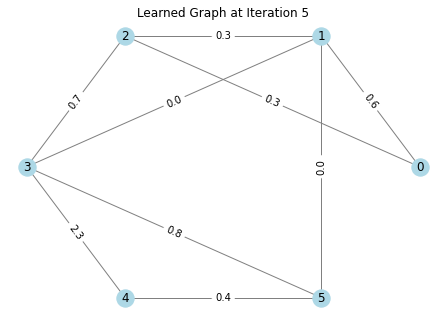

Final learned adjacency matrix:
tensor([[0.0000, 0.6190, 0.3203, 0.0000, 0.0000, -0.0000],
        [0.6190, 0.0000, 0.2823, 0.0370, 0.0000, 0.0102],
        [0.3203, 0.2823, 0.0000, 0.6582, -0.0000, -0.0000],
        [0.0000, 0.0370, 0.6582, 0.0000, 2.2749, 0.8144],
        [0.0000, 0.0000, -0.0000, 2.2749, 0.0000, 0.4278],
        [-0.0000, 0.0102, -0.0000, 0.8144, 0.4278, 0.0000]],
       grad_fn=<MulBackward0>) tensor(14.0430, grad_fn=<PowBackward0>)


In [2]:
torch.manual_seed(42)
gem = GEM(num_nodes, mu=0.2, gamma=0.4, step_size=0.02, c=5, PGD_iters=50, scale=True)
# initialize adjacency and S
# adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
# run GEM
# with torch.no_grad():
    # draw_graph_from_adj(adj_init, title='Initial Graph')
x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
W_final = adj_final * S_final
print("Final learned adjacency matrix:")
print(W_final, W_final.norm()**2)

Iteration 1/5
after E-step: delta_W norm 0.0605, GLR 12.7287, adj norm^2 6.6416
after M-step-1: delta_W norm 0.3337, GLR 11.6353, adj norm^2 6.6028
PGD iter 1/50, ||S_new - S||_F = 0.0697
PGD iter 11/50, ||S_new - S||_F = 0.0671
PGD iter 21/50, ||S_new - S||_F = 0.0638
PGD iter 31/50, ||S_new - S||_F = 0.0595
PGD iter 41/50, ||S_new - S||_F = 0.0538
tensor([[0.0000, 0.6238, 0.5439, 0.3433, 0.4253, 0.4706],
        [0.6238, 0.0000, 0.5186, 0.2124, 0.3453, 0.3552],
        [0.5439, 0.5186, 0.0000, 0.2907, 0.5344, 0.4745],
        [0.3433, 0.2124, 0.2907, 0.0000, 0.5872, 0.5107],
        [0.4253, 0.3453, 0.5344, 0.5872, 0.0000, 0.6564],
        [0.4706, 0.3552, 0.4745, 0.5107, 0.6564, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.0734, grad_fn=<PowBackward0>)


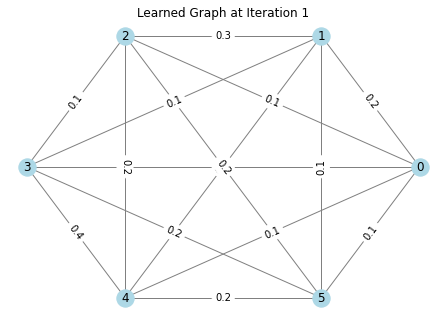

Iteration 2/5
after E-step: delta_W norm 0.3279, GLR 11.2092, adj norm^2 6.5742
after M-step-1: delta_W norm 0.1135, GLR 11.6543, adj norm^2 5.5419
PGD iter 1/50, ||S_new - S||_F = 0.1162
PGD iter 11/50, ||S_new - S||_F = 0.1116
PGD iter 21/50, ||S_new - S||_F = 0.1041
PGD iter 31/50, ||S_new - S||_F = 0.0902
PGD iter 41/50, ||S_new - S||_F = 0.0597
tensor([[0.0000, 0.2778, 0.2578, 0.0237, 0.0182, 0.0826],
        [0.2778, 0.0000, 0.2819, 0.0000, 0.1677, 0.0226],
        [0.2578, 0.2819, 0.0000, 0.2692, 0.1828, 0.0979],
        [0.0237, 0.0000, 0.2692, 0.0000, 0.3433, 0.6906],
        [0.0182, 0.1677, 0.1828, 0.3433, 0.0000, 0.6901],
        [0.0826, 0.0226, 0.0979, 0.6906, 0.6901, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(1.9231, grad_fn=<PowBackward0>)


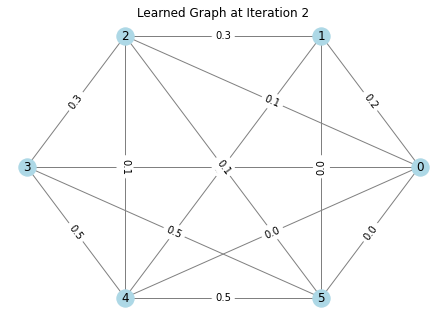

Iteration 3/5
after E-step: delta_W norm 0.1082, GLR 6.9255, adj norm^2 6.3817
after M-step-1: delta_W norm 0.3514, GLR 7.8143, adj norm^2 5.2402
PGD iter 1/50, ||S_new - S||_F = 0.2376
PGD iter 11/50, ||S_new - S||_F = 0.2251
PGD iter 21/50, ||S_new - S||_F = 0.1208
PGD iter 31/50, ||S_new - S||_F = 0.0330
PGD iter 41/50, ||S_new - S||_F = 0.0199
tensor([[0.0000, 0.2113, 0.0182, 0.0687, 0.0000, 0.0152],
        [0.2113, 0.0000, 0.2491, 0.0531, 0.0000, 0.0000],
        [0.0182, 0.2491, 0.0000, 0.0000, 0.1308, 0.0428],
        [0.0687, 0.0531, 0.0000, 0.0000, 0.6109, 0.6608],
        [0.0000, 0.0000, 0.1308, 0.6109, 0.0000, 0.3941],
        [0.0152, 0.0000, 0.0428, 0.6608, 0.3941, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.4783, grad_fn=<PowBackward0>)


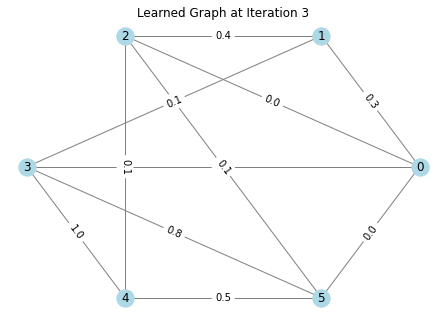

Iteration 4/5
after E-step: delta_W norm 0.3796, GLR 3.6809, adj norm^2 6.2613
after M-step-1: delta_W norm 0.7667, GLR 3.7594, adj norm^2 4.6674
PGD iter 1/50, ||S_new - S||_F = 0.2145
PGD iter 11/50, ||S_new - S||_F = 0.1988
PGD iter 21/50, ||S_new - S||_F = 0.1086
PGD iter 31/50, ||S_new - S||_F = 0.0523
PGD iter 41/50, ||S_new - S||_F = 0.0306
tensor([[0.0000, 0.5208, 0.6109, 0.0819, 0.0020, 0.5929],
        [0.5208, 0.0000, 0.3930, 0.0000, 0.0043, -0.0000],
        [0.6109, 0.3930, 0.0000, 0.0668, 0.0000, 0.2178],
        [0.0819, 0.0000, 0.0668, 0.0000, 0.2670, 0.5325],
        [0.0020, 0.0043, 0.0000, 0.2670, 0.0000, 0.6457],
        [0.5929, -0.0000, 0.2178, 0.5325, 0.6457, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(2.4081, grad_fn=<PowBackward0>)


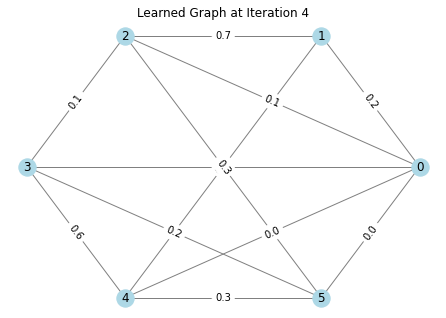

Iteration 5/5
after E-step: delta_W norm 1.2659, GLR 7.7407, adj norm^2 6.2517
after M-step-1: delta_W norm 0.3083, GLR 7.5912, adj norm^2 5.2056
PGD iter 1/50, ||S_new - S||_F = 0.1927
PGD iter 11/50, ||S_new - S||_F = 0.1834
PGD iter 21/50, ||S_new - S||_F = 0.1444
PGD iter 31/50, ||S_new - S||_F = 0.0510
PGD iter 41/50, ||S_new - S||_F = 0.0242
tensor([[0.0000, 0.0125, 0.4112, 0.0000, 0.0190, 0.1123],
        [0.0125, 0.0000, 0.4632, 0.0624, 0.0282, -0.0000],
        [0.4112, 0.4632, 0.0000, 0.0000, 0.0825, 0.0959],
        [0.0000, 0.0624, 0.0000, 0.0000, 0.3063, 0.2618],
        [0.0190, 0.0282, 0.0825, 0.3063, 0.0000, 0.0861],
        [0.1123, -0.0000, 0.0959, 0.2618, 0.0861, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(2.2688, grad_fn=<PowBackward0>)


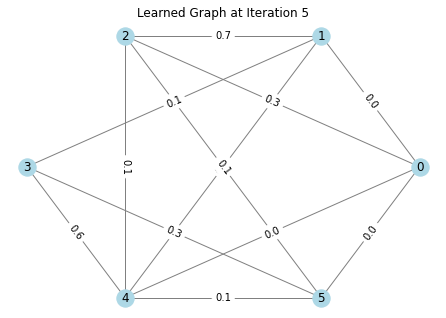

Final learned adjacency matrix:
tensor([[0.0000, 0.0156, 0.2978, 0.0000, 0.0130, 0.0481],
        [0.0156, 0.0000, 0.6862, 0.0907, 0.0335, -0.0000],
        [0.2978, 0.6862, 0.0000, 0.0000, 0.1114, 0.1226],
        [0.0000, 0.0907, 0.0000, 0.0000, 0.6349, 0.3493],
        [0.0130, 0.0335, 0.1114, 0.6349, 0.0000, 0.1011],
        [0.0481, -0.0000, 0.1226, 0.3493, 0.1011, 0.0000]],
       grad_fn=<MulBackward0>) tensor(2.2688, grad_fn=<PowBackward0>)


In [3]:
torch.manual_seed(42)
gem = GEM(num_nodes, mu=0.1, gamma=0.4, step_size=0.02, c=5, PGD_iters=50, scale=True)
# initialize adjacency and S
# adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
# run GEM
# with torch.no_grad():
    # draw_graph_from_adj(adj_init, title='Initial Graph')
x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
W_final = adj_final * S_final
print("Final learned adjacency matrix:")
print(W_final, W_final.norm()**2)

Iteration 1/5
after E-step: delta_W norm 0.1488, GLR 5.2718, adj norm^2 7.8985
after M-step-1: delta_W norm 0.0491, GLR 4.5055, adj norm^2 8.0126
PGD iter 1/50, ||S_new - S||_F = 0.0491
PGD iter 11/50, ||S_new - S||_F = 0.0473
PGD iter 21/50, ||S_new - S||_F = 0.0453
PGD iter 31/50, ||S_new - S||_F = 0.0430
PGD iter 41/50, ||S_new - S||_F = 0.0402
tensor([[0.0000, 0.6414, 0.6366, 0.6347, 0.6366, 0.6452],
        [0.6414, 0.0000, 0.7189, 0.4637, 0.4701, 0.4953],
        [0.6366, 0.7189, 0.0000, 0.4845, 0.6082, 0.6317],
        [0.6347, 0.4637, 0.4845, 0.0000, 0.7202, 0.6284],
        [0.6366, 0.4701, 0.6082, 0.7202, 0.0000, 0.7039],
        [0.6452, 0.4953, 0.6317, 0.6284, 0.7039, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.8702, grad_fn=<PowBackward0>)


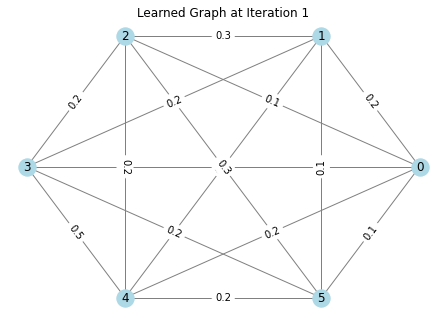

Iteration 2/5
after E-step: delta_W norm 0.0414, GLR 4.2118, adj norm^2 7.8565
after M-step-1: delta_W norm 0.0850, GLR 5.8252, adj norm^2 7.9617
PGD iter 1/50, ||S_new - S||_F = 0.0513
PGD iter 11/50, ||S_new - S||_F = 0.0498
PGD iter 21/50, ||S_new - S||_F = 0.0481
PGD iter 31/50, ||S_new - S||_F = 0.0459
PGD iter 41/50, ||S_new - S||_F = 0.0434
tensor([[0.0000, 0.8264, 0.5673, 0.5448, 0.4108, 0.3536],
        [0.8264, 0.0000, 1.0000, 1.0000, 0.2349, 0.5226],
        [0.5673, 1.0000, 0.0000, 0.6216, 0.9226, 0.6593],
        [0.5448, 1.0000, 0.6216, 0.0000, 0.3936, 0.7865],
        [0.4108, 0.2349, 0.9226, 0.3936, 0.0000, 0.7846],
        [0.3536, 0.5226, 0.6593, 0.7865, 0.7846, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(6.6709, grad_fn=<PowBackward0>)


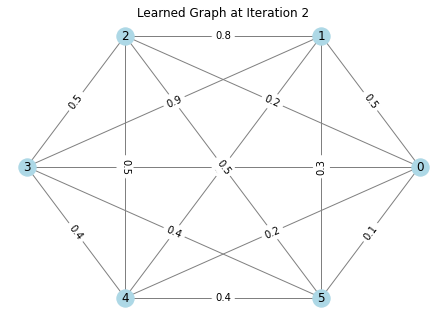

Iteration 3/5
after E-step: delta_W norm 0.0613, GLR 5.6474, adj norm^2 7.7361
after M-step-1: delta_W norm 0.0927, GLR 4.0834, adj norm^2 7.8822
PGD iter 1/50, ||S_new - S||_F = 0.0619
PGD iter 11/50, ||S_new - S||_F = 0.0599
PGD iter 21/50, ||S_new - S||_F = 0.0573
PGD iter 31/50, ||S_new - S||_F = 0.0540
PGD iter 41/50, ||S_new - S||_F = 0.0496
tensor([[0.0000, 0.6011, 0.5383, 0.4999, 0.2577, 0.5013],
        [0.6011, 0.0000, 0.5300, 0.2958, 0.1289, 0.5873],
        [0.5383, 0.5300, 0.0000, 0.6597, 0.6648, 0.6991],
        [0.4999, 0.2958, 0.6597, 0.0000, 1.0000, 0.6761],
        [0.2577, 0.1289, 0.6648, 1.0000, 0.0000, 0.4682],
        [0.5013, 0.5873, 0.6991, 0.6761, 0.4682, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.1312, grad_fn=<PowBackward0>)


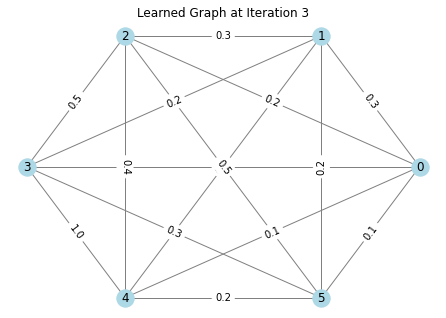

Iteration 4/5
after E-step: delta_W norm 0.0805, GLR 3.7681, adj norm^2 7.6490
after M-step-1: delta_W norm 0.1191, GLR 4.7868, adj norm^2 7.3217
PGD iter 1/50, ||S_new - S||_F = 0.0646
PGD iter 11/50, ||S_new - S||_F = 0.0624
PGD iter 21/50, ||S_new - S||_F = 0.0596
PGD iter 31/50, ||S_new - S||_F = 0.0560
PGD iter 41/50, ||S_new - S||_F = 0.0516
tensor([[0.0000, 0.5662, 0.5921, 0.4431, 0.4458, 0.5385],
        [0.5662, 0.0000, 0.3494, 0.8447, 0.3206, 0.4783],
        [0.5921, 0.3494, 0.0000, 0.4904, 0.3889, 0.5378],
        [0.4431, 0.8447, 0.4904, 0.0000, 0.6497, 0.4353],
        [0.4458, 0.3206, 0.3889, 0.6497, 0.0000, 0.3393],
        [0.5385, 0.4783, 0.5378, 0.4353, 0.3393, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(3.5385, grad_fn=<PowBackward0>)


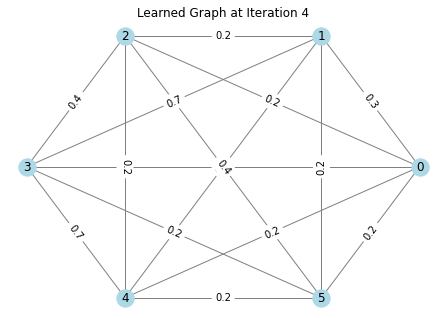

Iteration 5/5
after E-step: delta_W norm 0.1501, GLR 6.0958, adj norm^2 7.8150
after M-step-1: delta_W norm 0.0359, GLR 2.8934, adj norm^2 8.1210
PGD iter 1/50, ||S_new - S||_F = 0.0564
PGD iter 11/50, ||S_new - S||_F = 0.0545
PGD iter 21/50, ||S_new - S||_F = 0.0523
PGD iter 31/50, ||S_new - S||_F = 0.0496
PGD iter 41/50, ||S_new - S||_F = 0.0462
tensor([[0.0000, 0.3491, 0.5697, 0.4035, 0.5173, 0.5015],
        [0.3491, 0.0000, 0.6319, 0.3607, 0.8302, 0.6452],
        [0.5697, 0.6319, 0.0000, 0.6238, 0.4595, 0.2514],
        [0.4035, 0.3607, 0.6238, 0.0000, 1.0000, 0.7901],
        [0.5173, 0.8302, 0.4595, 1.0000, 0.0000, 0.9112],
        [0.5015, 0.6452, 0.2514, 0.7901, 0.9112, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(7.5720, grad_fn=<PowBackward0>)


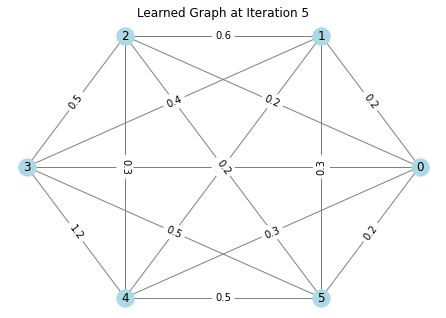

Final learned adjacency matrix:
tensor([[0.0000, 0.2390, 0.2190, 0.2152, 0.3242, 0.1675],
        [0.2390, 0.0000, 0.5545, 0.3599, 0.7755, 0.3498],
        [0.2190, 0.5545, 0.0000, 0.5488, 0.3079, 0.2171],
        [0.2152, 0.3599, 0.5488, 0.0000, 1.1869, 0.4830],
        [0.3242, 0.7755, 0.3079, 1.1869, 0.0000, 0.5055],
        [0.1675, 0.3498, 0.2171, 0.4830, 0.5055, 0.0000]],
       grad_fn=<MulBackward0>) tensor(7.5720, grad_fn=<PowBackward0>)


In [6]:
torch.manual_seed(42)
gem = GEM(num_nodes, mu=0.4, gamma=0.4, step_size=0.02, c=5, PGD_iters=50, scale=True)
# initialize adjacency and S
# adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
# run GEM
# with torch.no_grad():
    # draw_graph_from_adj(adj_init, title='Initial Graph')
x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
W_final = adj_final * S_final
print("Final learned adjacency matrix:")
print(W_final, W_final.norm()**2)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.0846, GLR 9.1415, adj norm^2 7.3336
PGD iter 1/50, ||S_new - S||_F = 0.0313
PGD iter 11/50, ||S_new - S||_F = 0.0307
PGD iter 21/50, ||S_new - S||_F = 0.0301
PGD iter 31/50, ||S_new - S||_F = 0.0295
PGD iter 41/50, ||S_new - S||_F = 0.0287
tensor([[0.0000, 0.8128, 0.7622, 0.7400, 0.6502, 0.7313],
        [0.8128, 0.0000, 0.6749, 0.6448, 0.6550, 0.7035],
        [0.7622, 0.6749, 0.0000, 0.7850, 0.7947, 0.7477],
        [0.7400, 0.6448, 0.7850, 0.0000, 0.7668, 0.8047],
        [0.6502, 0.6550, 0.7947, 0.7668, 0.0000, 0.7331],
        [0.7313, 0.7035, 0.7477, 0.8047, 0.7331, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(2.6727, grad_fn=<PowBackward0>)


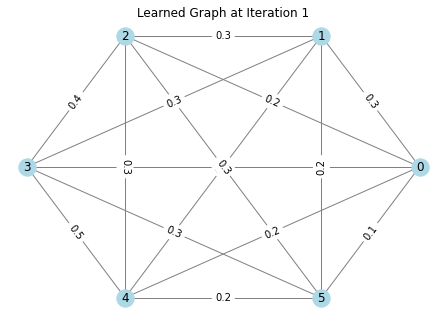

Iteration 2/5
after E-step: delta_W norm 0.0809, GLR 8.9642, adj norm^2 7.1932
after M-step-1: delta_W norm 0.0792, GLR 9.0232, adj norm^2 7.1250
PGD iter 1/50, ||S_new - S||_F = 0.0354
PGD iter 11/50, ||S_new - S||_F = 0.0348
PGD iter 21/50, ||S_new - S||_F = 0.0342
PGD iter 31/50, ||S_new - S||_F = 0.0334
PGD iter 41/50, ||S_new - S||_F = 0.0325
tensor([[0.0000, 0.6622, 0.7595, 0.6413, 0.5698, 0.6812],
        [0.6622, 0.0000, 0.8258, 0.6364, 0.5651, 0.6350],
        [0.7595, 0.8258, 0.0000, 0.9046, 0.7616, 0.6864],
        [0.6413, 0.6364, 0.9046, 0.0000, 0.7096, 0.8316],
        [0.5698, 0.5651, 0.7616, 0.7096, 0.0000, 0.7307],
        [0.6812, 0.6350, 0.6864, 0.8316, 0.7307, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(4.8194, grad_fn=<PowBackward0>)


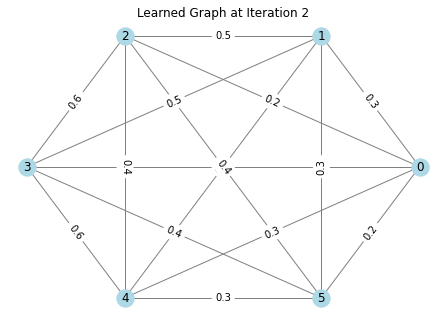

Iteration 3/5
after E-step: delta_W norm 0.0716, GLR 7.8671, adj norm^2 7.1617
after M-step-1: delta_W norm 0.0711, GLR 7.6788, adj norm^2 6.9260
PGD iter 1/50, ||S_new - S||_F = 0.0361
PGD iter 11/50, ||S_new - S||_F = 0.0355
PGD iter 21/50, ||S_new - S||_F = 0.0348
PGD iter 31/50, ||S_new - S||_F = 0.0341
PGD iter 41/50, ||S_new - S||_F = 0.0332
tensor([[0.0000, 0.6567, 0.7941, 0.6323, 0.6155, 0.6431],
        [0.6567, 0.0000, 0.9102, 0.8181, 0.4898, 0.6710],
        [0.7941, 0.9102, 0.0000, 0.7370, 0.7058, 0.7577],
        [0.6323, 0.8181, 0.7370, 0.0000, 0.6024, 0.7719],
        [0.6155, 0.4898, 0.7058, 0.6024, 0.0000, 0.7293],
        [0.6431, 0.6710, 0.7577, 0.7719, 0.7293, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.9452, grad_fn=<PowBackward0>)


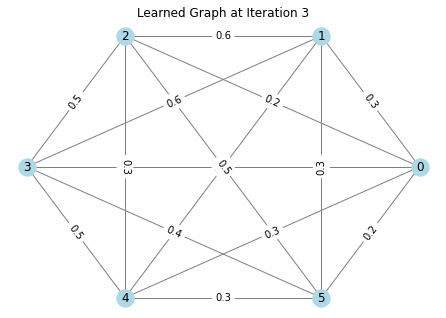

Iteration 4/5
after E-step: delta_W norm 0.0729, GLR 8.0938, adj norm^2 7.1518
after M-step-1: delta_W norm 0.0595, GLR 8.1075, adj norm^2 6.9472
PGD iter 1/50, ||S_new - S||_F = 0.0375
PGD iter 11/50, ||S_new - S||_F = 0.0369
PGD iter 21/50, ||S_new - S||_F = 0.0362
PGD iter 31/50, ||S_new - S||_F = 0.0354
PGD iter 41/50, ||S_new - S||_F = 0.0344
tensor([[0.0000, 0.8385, 0.8296, 0.7278, 0.5523, 0.6352],
        [0.8385, 0.0000, 0.9101, 0.7208, 0.4878, 0.6696],
        [0.8296, 0.9101, 0.0000, 0.7376, 0.5902, 0.6015],
        [0.7278, 0.7208, 0.7376, 0.0000, 0.6088, 0.7726],
        [0.5523, 0.4878, 0.5902, 0.6088, 0.0000, 0.7302],
        [0.6352, 0.6696, 0.6015, 0.7726, 0.7302, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.7571, grad_fn=<PowBackward0>)


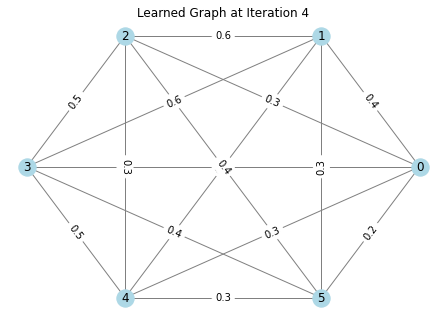

Iteration 5/5
after E-step: delta_W norm 0.0593, GLR 8.5049, adj norm^2 7.1410
after M-step-1: delta_W norm 0.0729, GLR 9.1421, adj norm^2 6.9966
PGD iter 1/50, ||S_new - S||_F = 0.0342
PGD iter 11/50, ||S_new - S||_F = 0.0336
PGD iter 21/50, ||S_new - S||_F = 0.0330
PGD iter 31/50, ||S_new - S||_F = 0.0324
PGD iter 41/50, ||S_new - S||_F = 0.0316
tensor([[0.0000, 0.7732, 0.7897, 0.6729, 0.6032, 0.6664],
        [0.7732, 0.0000, 0.9098, 0.7157, 0.5541, 0.6691],
        [0.7897, 0.9098, 0.0000, 0.8174, 0.6931, 0.5976],
        [0.6729, 0.7157, 0.8174, 0.0000, 0.9274, 0.6528],
        [0.6032, 0.5541, 0.6931, 0.9274, 0.0000, 0.7772],
        [0.6664, 0.6691, 0.5976, 0.6528, 0.7772, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(5.9907, grad_fn=<PowBackward0>)


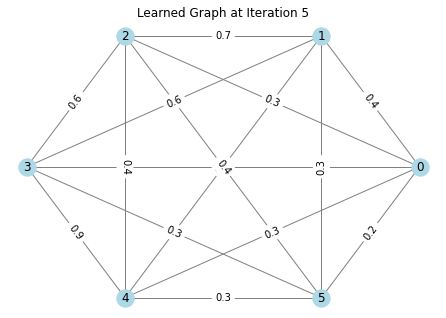

Final learned adjacency matrix:
tensor([[0.0000, 0.4053, 0.2507, 0.2878, 0.2850, 0.1789],
        [0.4053, 0.0000, 0.6630, 0.5663, 0.3962, 0.2884],
        [0.2507, 0.6630, 0.0000, 0.5727, 0.3552, 0.3895],
        [0.2878, 0.5663, 0.5727, 0.0000, 0.8692, 0.3098],
        [0.2850, 0.3962, 0.3552, 0.8692, 0.0000, 0.3384],
        [0.1789, 0.2884, 0.3895, 0.3098, 0.3384, 0.0000]],
       grad_fn=<MulBackward0>) tensor(5.9907, grad_fn=<PowBackward0>)


In [4]:
torch.manual_seed(42)
gem = GEM(num_nodes, mu=0.2, gamma=0.4, step_size=0.01, c=5, PGD_iters=50, scale=True)
# initialize adjacency and S
# adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
# run GEM
# with torch.no_grad():
    # draw_graph_from_adj(adj_init, title='Initial Graph')
x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
W_final = adj_final * S_final
print("Final learned adjacency matrix:")
print(W_final, W_final.norm()**2)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.0846, GLR 9.1415, adj norm^2 7.3336
PGD iter 1/100, ||S_new - S||_F = 0.0313
PGD iter 11/100, ||S_new - S||_F = 0.0307
PGD iter 21/100, ||S_new - S||_F = 0.0301
PGD iter 31/100, ||S_new - S||_F = 0.0295
PGD iter 41/100, ||S_new - S||_F = 0.0287
PGD iter 51/100, ||S_new - S||_F = 0.0279
PGD iter 61/100, ||S_new - S||_F = 0.0270
PGD iter 71/100, ||S_new - S||_F = 0.0260
PGD iter 81/100, ||S_new - S||_F = 0.0248
PGD iter 91/100, ||S_new - S||_F = 0.0235
tensor([[0.0000, 0.6676, 0.5496, 0.5136, 0.3442, 0.4872],
        [0.6676, 0.0000, 0.4014, 0.3480, 0.3698, 0.4428],
        [0.5496, 0.4014, 0.0000, 0.6075, 0.6224, 0.5400],
        [0.5136, 0.3480, 0.6075, 0.0000, 0.5837, 0.6411],
        [0.3442, 0.3698, 0.6224, 0.5837, 0.0000, 0.4991],
        [0.4872, 0.4428, 0.5400, 0.6411, 0.4991, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.3280, grad_fn=<PowBackwa

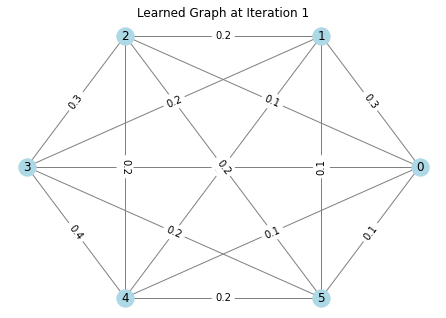

Iteration 2/5
after E-step: delta_W norm 0.0801, GLR 5.8015, adj norm^2 7.1509
after M-step-1: delta_W norm 0.0213, GLR 9.2284, adj norm^2 6.9750
PGD iter 1/100, ||S_new - S||_F = 0.0517
PGD iter 11/100, ||S_new - S||_F = 0.0508
PGD iter 21/100, ||S_new - S||_F = 0.0497
PGD iter 31/100, ||S_new - S||_F = 0.0483
PGD iter 41/100, ||S_new - S||_F = 0.0466
PGD iter 51/100, ||S_new - S||_F = 0.0443
PGD iter 61/100, ||S_new - S||_F = 0.0413
PGD iter 71/100, ||S_new - S||_F = 0.0332
PGD iter 81/100, ||S_new - S||_F = 0.0263
PGD iter 91/100, ||S_new - S||_F = 0.0229
tensor([[0.0000, 0.3934, 0.4848, 0.1741, 0.0000, 0.4263],
        [0.3934, 0.0000, 0.6815, -0.0000, 0.1115, 0.2700],
        [0.4848, 0.6815, 0.0000, 0.2634, 0.2160, 0.2625],
        [0.1741, -0.0000, 0.2634, 0.0000, 0.1849, 0.6890],
        [0.0000, 0.1115, 0.2160, 0.1849, 0.0000, 0.6970],
        [0.4263, 0.2700, 0.2625, 0.6890, 0.6970, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.3663, grad_fn=<PowBack

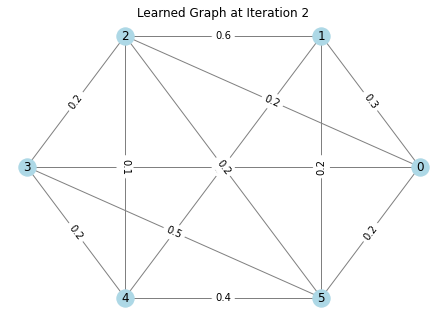

Iteration 3/5
after E-step: delta_W norm 0.0259, GLR 6.7194, adj norm^2 6.8059
after M-step-1: delta_W norm 0.0575, GLR 6.9322, adj norm^2 6.7866
PGD iter 1/100, ||S_new - S||_F = 0.0638
PGD iter 11/100, ||S_new - S||_F = 0.0628
PGD iter 21/100, ||S_new - S||_F = 0.0615
PGD iter 31/100, ||S_new - S||_F = 0.0598
PGD iter 41/100, ||S_new - S||_F = 0.0573
PGD iter 51/100, ||S_new - S||_F = 0.0533
PGD iter 61/100, ||S_new - S||_F = 0.0333
PGD iter 71/100, ||S_new - S||_F = 0.0303
PGD iter 81/100, ||S_new - S||_F = 0.0241
PGD iter 91/100, ||S_new - S||_F = 0.0212
tensor([[0.0000, 0.3054, 0.4260, -0.0000, -0.0000, -0.0000],
        [0.3054, 0.0000, 0.9326, 0.0000, 0.0000, 0.0727],
        [0.4260, 0.9326, 0.0000, 0.8988, -0.0000, 0.3091],
        [-0.0000, 0.0000, 0.8988, 0.0000, 0.5723, 0.6082],
        [-0.0000, 0.0000, -0.0000, 0.5723, 0.0000, 0.8475],
        [-0.0000, 0.0727, 0.3091, 0.6082, 0.8475, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(10.7256, grad_fn=<

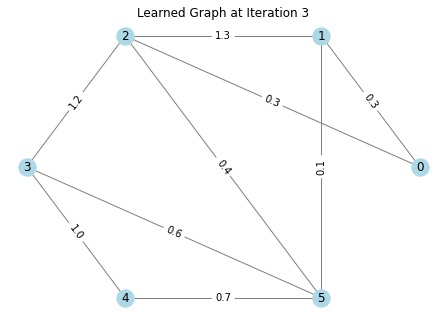

Iteration 4/5
after E-step: delta_W norm 0.0524, GLR 5.3015, adj norm^2 6.6035
after M-step-1: delta_W norm 0.0921, GLR 4.0065, adj norm^2 6.4258
PGD iter 1/100, ||S_new - S||_F = 0.0568
PGD iter 11/100, ||S_new - S||_F = 0.0559
PGD iter 21/100, ||S_new - S||_F = 0.0547
PGD iter 31/100, ||S_new - S||_F = 0.0532
PGD iter 41/100, ||S_new - S||_F = 0.0512
PGD iter 51/100, ||S_new - S||_F = 0.0485
PGD iter 61/100, ||S_new - S||_F = 0.0445
PGD iter 71/100, ||S_new - S||_F = 0.0321
PGD iter 81/100, ||S_new - S||_F = 0.0262
PGD iter 91/100, ||S_new - S||_F = 0.0218
tensor([[0.0000, 0.2212, 0.2580, 0.2703, -0.0000, 0.1554],
        [0.2212, 0.0000, 0.7189, -0.0000, -0.0000, 0.1760],
        [0.2580, 0.7189, 0.0000, 0.1157, 0.1443, 0.3261],
        [0.2703, -0.0000, 0.1157, 0.0000, 0.6848, 0.6926],
        [-0.0000, -0.0000, 0.1443, 0.6848, 0.0000, 0.5661],
        [0.1554, 0.1760, 0.3261, 0.6926, 0.5661, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(3.3082, grad_fn=<Pow

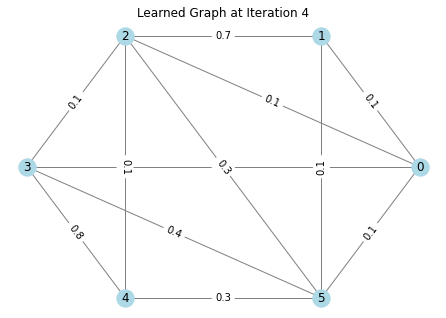

Iteration 5/5
after E-step: delta_W norm 0.0890, GLR 5.2170, adj norm^2 6.6586
after M-step-1: delta_W norm 0.0384, GLR 5.9705, adj norm^2 6.7946
PGD iter 1/100, ||S_new - S||_F = 0.0707
PGD iter 11/100, ||S_new - S||_F = 0.0694
PGD iter 21/100, ||S_new - S||_F = 0.0678
PGD iter 31/100, ||S_new - S||_F = 0.0655
PGD iter 41/100, ||S_new - S||_F = 0.0619
PGD iter 51/100, ||S_new - S||_F = 0.0506
PGD iter 61/100, ||S_new - S||_F = 0.0441
PGD iter 71/100, ||S_new - S||_F = 0.0331
PGD iter 81/100, ||S_new - S||_F = 0.0206
PGD iter 91/100, ||S_new - S||_F = 0.0139
tensor([[0.0000, 0.1182, 0.3846, 0.0130, 0.0000, 0.1489],
        [0.1182, 0.0000, 0.5113, 0.0000, -0.0000, 0.0168],
        [0.3846, 0.5113, 0.0000, 0.4797, -0.0000, 0.0437],
        [0.0130, 0.0000, 0.4797, 0.0000, 0.3761, 0.6803],
        [0.0000, -0.0000, -0.0000, 0.3761, 0.0000, 0.5479],
        [0.1489, 0.0168, 0.0437, 0.6803, 0.5479, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(2.9125, grad_fn=<PowBa

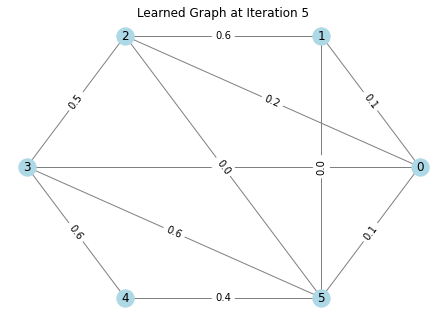

Final learned adjacency matrix:
tensor([[0.0000, 0.1085, 0.2151, 0.0098, 0.0000, 0.0693],
        [0.1085, 0.0000, 0.5698, 0.0000, -0.0000, 0.0122],
        [0.2151, 0.5698, 0.0000, 0.5197, -0.0000, 0.0478],
        [0.0098, 0.0000, 0.5197, 0.0000, 0.5723, 0.5527],
        [0.0000, -0.0000, -0.0000, 0.5723, 0.0000, 0.4038],
        [0.0693, 0.0122, 0.0478, 0.5527, 0.4038, 0.0000]],
       grad_fn=<MulBackward0>) tensor(2.9125, grad_fn=<PowBackward0>)


In [5]:
torch.manual_seed(42)
gem = GEM(num_nodes, mu=0.2, gamma=0.4, step_size=0.01, c=5, PGD_iters=100, scale=True)
# initialize adjacency and S
# adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
# run GEM
# with torch.no_grad():
    # draw_graph_from_adj(adj_init, title='Initial Graph')
x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
W_final = adj_final * S_final
print("Final learned adjacency matrix:")
print(W_final, W_final.norm()**2)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/50, ||S_new - S||_F = 0.0406
PGD iter 11/50, ||S_new - S||_F = 0.0392
PGD iter 21/50, ||S_new - S||_F = 0.0376
PGD iter 31/50, ||S_new - S||_F = 0.0359
PGD iter 41/50, ||S_new - S||_F = 0.0339
tensor([[0.0000, 0.8414, 0.7414, 0.7022, 0.5367, 0.6911],
        [0.8414, 0.0000, 0.5704, 0.5025, 0.5157, 0.6334],
        [0.7414, 0.5704, 0.0000, 0.7747, 0.7922, 0.7089],
        [0.7022, 0.5025, 0.7747, 0.0000, 0.7386, 0.8172],
        [0.5367, 0.5157, 0.7922, 0.7386, 0.0000, 0.6771],
        [0.6911, 0.6334, 0.7089, 0.8172, 0.6771, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(2.3106, grad_fn=<PowBackward0>)


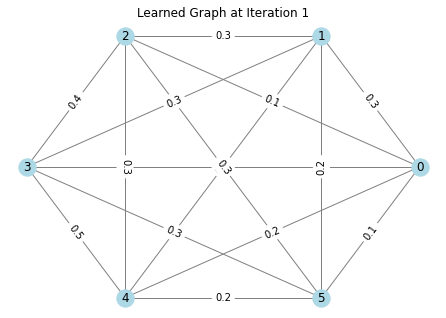

Iteration 2/5
after E-step: delta_W norm 0.1663, GLR 7.2426, adj norm^2 7.1665
after M-step-1: delta_W norm 0.0580, GLR 8.2360, adj norm^2 6.3540
PGD iter 1/50, ||S_new - S||_F = 0.0581
PGD iter 11/50, ||S_new - S||_F = 0.0561
PGD iter 21/50, ||S_new - S||_F = 0.0536
PGD iter 31/50, ||S_new - S||_F = 0.0506
PGD iter 41/50, ||S_new - S||_F = 0.0469
tensor([[0.0000, 0.5081, 0.6190, 0.5407, 0.1942, 0.5954],
        [0.5081, 0.0000, 0.5222, 0.4726, 0.3721, 0.4430],
        [0.6190, 0.5222, 0.0000, 0.8480, 0.4832, 0.5556],
        [0.5407, 0.4726, 0.8480, 0.0000, 0.6167, 0.7417],
        [0.1942, 0.3721, 0.4832, 0.6167, 0.0000, 0.8721],
        [0.5954, 0.4430, 0.5556, 0.7417, 0.8721, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.6711, grad_fn=<PowBackward0>)


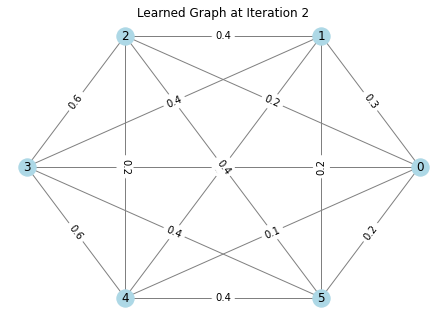

Iteration 3/5
after E-step: delta_W norm 0.0458, GLR 8.6442, adj norm^2 7.1014
after M-step-1: delta_W norm 0.0783, GLR 8.2461, adj norm^2 7.2807
PGD iter 1/50, ||S_new - S||_F = 0.0676
PGD iter 11/50, ||S_new - S||_F = 0.0652
PGD iter 21/50, ||S_new - S||_F = 0.0621
PGD iter 31/50, ||S_new - S||_F = 0.0580
PGD iter 41/50, ||S_new - S||_F = 0.0523
tensor([[0.0000, 0.1370, 0.7904, 0.2754, 0.3340, 0.4293],
        [0.1370, 0.0000, 0.4614, 0.3917, 0.2348, 0.3559],
        [0.7904, 0.4614, 0.0000, 0.6165, 0.6896, 0.4645],
        [0.2754, 0.3917, 0.6165, 0.0000, 0.8069, 0.8465],
        [0.3340, 0.2348, 0.6896, 0.8069, 0.0000, 0.8505],
        [0.4293, 0.3559, 0.4645, 0.8465, 0.8505, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.6768, grad_fn=<PowBackward0>)


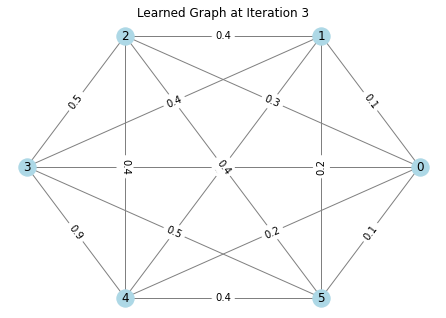

Iteration 4/5
after E-step: delta_W norm 0.0884, GLR 7.9656, adj norm^2 7.0554
after M-step-1: delta_W norm 0.1358, GLR 7.2031, adj norm^2 6.6317
PGD iter 1/50, ||S_new - S||_F = 0.0692
PGD iter 11/50, ||S_new - S||_F = 0.0669
PGD iter 21/50, ||S_new - S||_F = 0.0640
PGD iter 31/50, ||S_new - S||_F = 0.0601
PGD iter 41/50, ||S_new - S||_F = 0.0450
tensor([[0.0000, 0.3476, 0.6784, 0.4943, 0.3272, 0.4089],
        [0.3476, 0.0000, 0.8484, 0.6191, 0.0000, 0.3945],
        [0.6784, 0.8484, 0.0000, 0.4254, 0.6822, 0.3120],
        [0.4943, 0.6191, 0.4254, 0.0000, 0.8013, 0.7224],
        [0.3272, 0.0000, 0.6822, 0.8013, 0.0000, 0.8620],
        [0.4089, 0.3945, 0.3120, 0.7224, 0.8620, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(5.5431, grad_fn=<PowBackward0>)


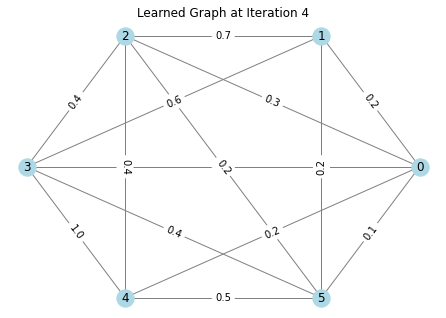

Iteration 5/5
after E-step: delta_W norm 0.1321, GLR 7.9873, adj norm^2 6.9874
after M-step-1: delta_W norm 0.2142, GLR 7.4621, adj norm^2 5.4966
PGD iter 1/50, ||S_new - S||_F = 0.0757
PGD iter 11/50, ||S_new - S||_F = 0.0727
PGD iter 21/50, ||S_new - S||_F = 0.0688
PGD iter 31/50, ||S_new - S||_F = 0.0632
PGD iter 41/50, ||S_new - S||_F = 0.0551
tensor([[0.0000, 0.7799, 0.5851, 0.5294, 0.4102, 0.5335],
        [0.7799, 0.0000, 0.6714, 0.1408, 0.0904, 0.5342],
        [0.5851, 0.6714, 0.0000, 0.3480, 0.4714, 0.2177],
        [0.5294, 0.1408, 0.3480, 0.0000, 0.1099, 0.6605],
        [0.4102, 0.0904, 0.4714, 0.1099, 0.0000, 0.7737],
        [0.5335, 0.5342, 0.2177, 0.6605, 0.7737, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(2.2940, grad_fn=<PowBackward0>)


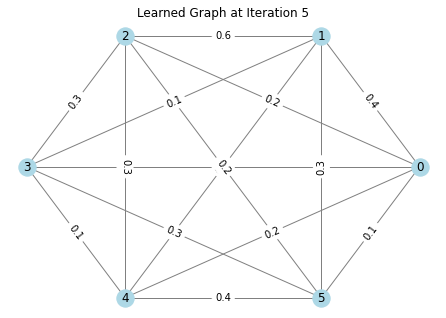

Final learned adjacency matrix:
tensor([[0.0000, 0.3501, 0.2341, 0.2687, 0.2097, 0.1472],
        [0.3501, 0.0000, 0.5762, 0.1117, 0.0608, 0.2586],
        [0.2341, 0.5762, 0.0000, 0.2608, 0.2663, 0.1556],
        [0.2687, 0.1117, 0.2608, 0.0000, 0.1301, 0.3055],
        [0.2097, 0.0608, 0.2663, 0.1301, 0.0000, 0.3785],
        [0.1472, 0.2586, 0.1556, 0.3055, 0.3785, 0.0000]],
       grad_fn=<MulBackward0>) tensor(2.2940, grad_fn=<PowBackward0>)


In [8]:
torch.manual_seed(42)
gem = GEM(num_nodes, mu=0.2, gamma=0.2, step_size=0.02, c=5, PGD_iters=50, scale=True)
# initialize adjacency and S
# adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
# run GEM
# with torch.no_grad():
    # draw_graph_from_adj(adj_init, title='Initial Graph')
x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
W_final = adj_final * S_final
print("Final learned adjacency matrix:")
print(W_final, W_final.norm()**2)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/50, ||S_new - S||_F = 0.1051
PGD iter 11/50, ||S_new - S||_F = 0.1008
PGD iter 21/50, ||S_new - S||_F = 0.0945
PGD iter 31/50, ||S_new - S||_F = 0.0842
PGD iter 41/50, ||S_new - S||_F = 0.0672
tensor([[0.0000, 0.3960, 0.2329, 0.2250, 0.0911, 0.1775],
        [0.3960, 0.0000, 0.1535, 0.1136, 0.1344, 0.1593],
        [0.2329, 0.1535, 0.0000, 0.3167, 0.3197, 0.2747],
        [0.2250, 0.1136, 0.3167, 0.0000, 0.3203, 0.3396],
        [0.0911, 0.1344, 0.3197, 0.3203, 0.0000, 0.1988],
        [0.1775, 0.1593, 0.2747, 0.3396, 0.1988, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.3286, grad_fn=<PowBackward0>)


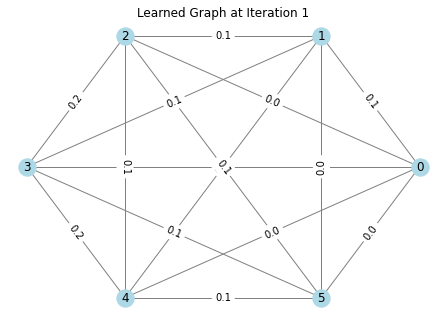

Iteration 2/5
after E-step: delta_W norm 0.1432, GLR 8.2839, adj norm^2 7.0514
after M-step-1: delta_W norm 0.1018, GLR 7.2880, adj norm^2 6.0756
PGD iter 1/50, ||S_new - S||_F = 0.2591
PGD iter 11/50, ||S_new - S||_F = 0.2431
PGD iter 21/50, ||S_new - S||_F = 0.1271
PGD iter 31/50, ||S_new - S||_F = 0.0337
PGD iter 41/50, ||S_new - S||_F = 0.0132
tensor([[0.0000, 0.1439, 0.0598, 0.0429, 0.0317, 0.0171],
        [0.1439, 0.0000, 0.1185, 0.0036, 0.0569, 0.0000],
        [0.0598, 0.1185, 0.0000, 0.0416, 0.0081, 0.1549],
        [0.0429, 0.0036, 0.0416, 0.0000, 0.2009, 0.2755],
        [0.0317, 0.0569, 0.0081, 0.2009, 0.0000, 0.0000],
        [0.0171, 0.0000, 0.1549, 0.2755, 0.0000, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(1.2382, grad_fn=<PowBackward0>)


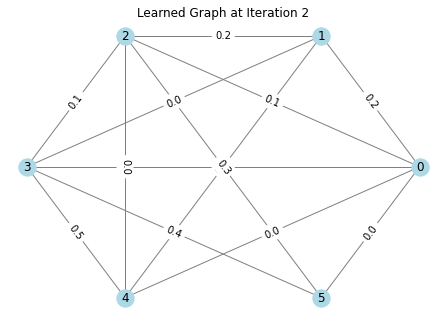

Iteration 3/5
after E-step: delta_W norm 0.0688, GLR 6.0116, adj norm^2 6.6903
after M-step-1: delta_W norm 0.0552, GLR 6.1053, adj norm^2 6.4613
PGD iter 1/50, ||S_new - S||_F = 0.4175
PGD iter 11/50, ||S_new - S||_F = 0.2738
PGD iter 21/50, ||S_new - S||_F = 0.0595
PGD iter 31/50, ||S_new - S||_F = 0.0307
PGD iter 41/50, ||S_new - S||_F = 0.0105
tensor([[0.0000, 0.0752, 0.0000, -0.0000, 0.0812, 0.0000],
        [0.0752, 0.0000, 0.1138, 0.0000, 0.0000, -0.0000],
        [0.0000, 0.1138, 0.0000, -0.0000, 0.1497, 0.0582],
        [-0.0000, 0.0000, -0.0000, 0.0000, 0.7343, 0.0000],
        [0.0812, 0.0000, 0.1497, 0.7343, 0.0000, 0.3463],
        [0.0000, -0.0000, 0.0582, 0.0000, 0.3463, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(32.3605, grad_fn=<PowBackward0>)


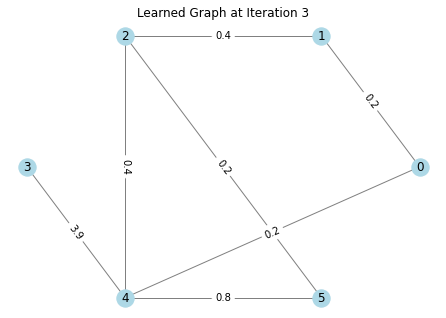

Iteration 4/5
after E-step: delta_W norm 0.0364, GLR 2.4461, adj norm^2 6.3878
after M-step-1: delta_W norm 0.1076, GLR 2.9230, adj norm^2 5.7576
PGD iter 1/50, ||S_new - S||_F = 0.2265
PGD iter 11/50, ||S_new - S||_F = 0.2141
PGD iter 21/50, ||S_new - S||_F = 0.1382
PGD iter 31/50, ||S_new - S||_F = 0.0443
PGD iter 41/50, ||S_new - S||_F = 0.0193
tensor([[0.0000, 0.1196, 0.2656, 0.0000, 0.0242, 0.0135],
        [0.1196, 0.0000, 0.1591, 0.0000, 0.0278, 0.0231],
        [0.2656, 0.1591, 0.0000, 0.2467, 0.0000, 0.0211],
        [0.0000, 0.0000, 0.2467, 0.0000, 0.7013, 0.0291],
        [0.0242, 0.0278, 0.0000, 0.7013, 0.0000, 0.3709],
        [0.0135, 0.0231, 0.0211, 0.0291, 0.3709, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.8192, grad_fn=<PowBackward0>)


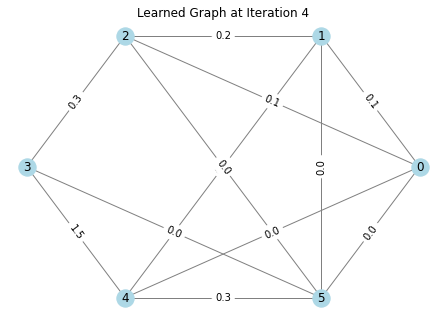

Iteration 5/5
after E-step: delta_W norm 0.1604, GLR 3.4194, adj norm^2 6.4286
after M-step-1: delta_W norm 0.0802, GLR 2.7419, adj norm^2 6.1457
PGD iter 1/50, ||S_new - S||_F = 0.2257
PGD iter 11/50, ||S_new - S||_F = 0.2140
PGD iter 21/50, ||S_new - S||_F = 0.1503
PGD iter 31/50, ||S_new - S||_F = 0.0430
PGD iter 41/50, ||S_new - S||_F = 0.0230
tensor([[0.0000, 0.1142, 0.2175, 0.0021, 0.0137, 0.0477],
        [0.1142, 0.0000, 0.1768, 0.1127, -0.0000, 0.0000],
        [0.2175, 0.1768, 0.0000, 0.0250, 0.0682, 0.0567],
        [0.0021, 0.1127, 0.0250, 0.0000, 0.3650, 0.1157],
        [0.0137, -0.0000, 0.0682, 0.3650, 0.0000, 0.3011],
        [0.0477, 0.0000, 0.0567, 0.1157, 0.3011, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(1.6154, grad_fn=<PowBackward0>)


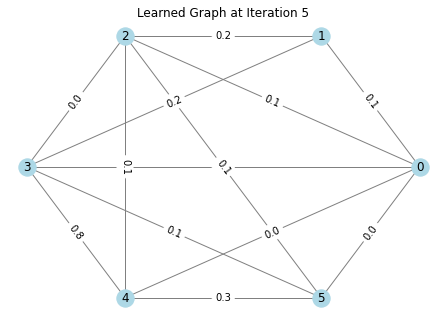

Final learned adjacency matrix:
tensor([[0.0000, 0.1172, 0.1429, 0.0018, 0.0120, 0.0245],
        [0.1172, 0.0000, 0.2480, 0.1563, -0.0000, 0.0000],
        [0.1429, 0.2480, 0.0000, 0.0329, 0.0708, 0.0707],
        [0.0018, 0.1563, 0.0329, 0.0000, 0.7699, 0.1099],
        [0.0120, -0.0000, 0.0708, 0.7699, 0.0000, 0.2663],
        [0.0245, 0.0000, 0.0707, 0.1099, 0.2663, 0.0000]],
       grad_fn=<MulBackward0>) tensor(1.6154, grad_fn=<PowBackward0>)


In [9]:
torch.manual_seed(42)
gem = GEM(num_nodes, mu=0.2, gamma=0.8, step_size=0.02, c=5, PGD_iters=50, scale=True)
# initialize adjacency and S
# adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
# run GEM
# with torch.no_grad():
    # draw_graph_from_adj(adj_init, title='Initial Graph')
x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
W_final = adj_final * S_final
print("Final learned adjacency matrix:")
print(W_final, W_final.norm()**2)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.0846, GLR 9.1415, adj norm^2 7.3336
PGD iter 1/100, ||S_new - S||_F = 0.0529
PGD iter 11/100, ||S_new - S||_F = 0.0520
PGD iter 21/100, ||S_new - S||_F = 0.0508
PGD iter 31/100, ||S_new - S||_F = 0.0494
PGD iter 41/100, ||S_new - S||_F = 0.0476
PGD iter 51/100, ||S_new - S||_F = 0.0453
PGD iter 61/100, ||S_new - S||_F = 0.0424
PGD iter 71/100, ||S_new - S||_F = 0.0386
PGD iter 81/100, ||S_new - S||_F = 0.0338
PGD iter 91/100, ||S_new - S||_F = 0.0277
tensor([[0.0000, 0.3918, 0.2294, 0.2185, 0.0776, 0.1657],
        [0.3918, 0.0000, 0.1523, 0.1162, 0.1421, 0.1517],
        [0.2294, 0.1523, 0.0000, 0.3191, 0.3201, 0.2733],
        [0.2185, 0.1162, 0.3191, 0.0000, 0.3257, 0.3380],
        [0.0776, 0.1421, 0.3201, 0.3257, 0.0000, 0.1988],
        [0.1657, 0.1517, 0.2733, 0.3380, 0.1988, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.3266, grad_fn=<PowBackwa

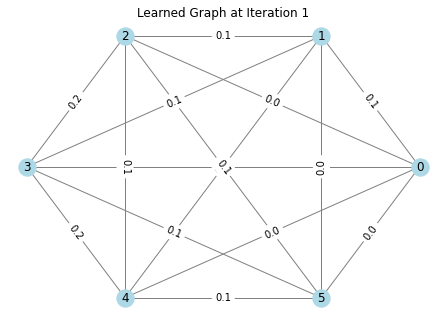

Iteration 2/5
after E-step: delta_W norm 0.0710, GLR 8.0114, adj norm^2 7.0540
after M-step-1: delta_W norm 0.0434, GLR 6.6322, adj norm^2 6.8625
PGD iter 1/100, ||S_new - S||_F = 0.1101
PGD iter 11/100, ||S_new - S||_F = 0.1079
PGD iter 21/100, ||S_new - S||_F = 0.1043
PGD iter 31/100, ||S_new - S||_F = 0.0976
PGD iter 41/100, ||S_new - S||_F = 0.0754
PGD iter 51/100, ||S_new - S||_F = 0.0401
PGD iter 61/100, ||S_new - S||_F = 0.0232
PGD iter 71/100, ||S_new - S||_F = 0.0106
PGD iter 81/100, ||S_new - S||_F = 0.0080
PGD iter 91/100, ||S_new - S||_F = 0.0063
tensor([[0.0000e+00, 1.9356e-01, 0.0000e+00, 1.3113e-01, 0.0000e+00, 3.0879e-04],
        [1.9356e-01, 0.0000e+00, 4.0565e-01, 1.4800e-02, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 4.0565e-01, 0.0000e+00, 4.4616e-02, 2.3798e-01, 4.5983e-02],
        [1.3113e-01, 1.4800e-02, 4.4616e-02, 0.0000e+00, 1.4705e-01, 1.0940e-01],
        [0.0000e+00, 0.0000e+00, 2.3798e-01, 1.4705e-01, 0.0000e+00, 2.6847e-01],
        [3.0880e-04, 0.00

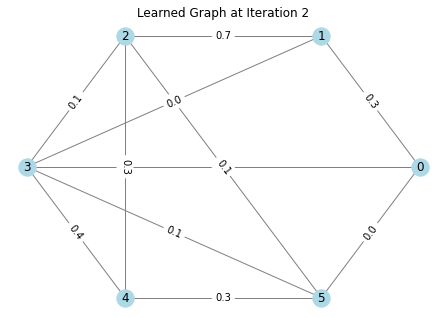

Iteration 3/5
after E-step: delta_W norm 0.0697, GLR 5.6628, adj norm^2 6.6497
after M-step-1: delta_W norm 0.0822, GLR 5.4114, adj norm^2 6.6189
PGD iter 1/100, ||S_new - S||_F = 0.1822
PGD iter 11/100, ||S_new - S||_F = 0.1779
PGD iter 21/100, ||S_new - S||_F = 0.1344
PGD iter 31/100, ||S_new - S||_F = 0.0795
PGD iter 41/100, ||S_new - S||_F = 0.0286
PGD iter 51/100, ||S_new - S||_F = 0.0182
PGD iter 61/100, ||S_new - S||_F = 0.0131
PGD iter 71/100, ||S_new - S||_F = 0.0100
PGD iter 81/100, ||S_new - S||_F = 0.0076
PGD iter 91/100, ||S_new - S||_F = 0.0056
tensor([[0.0000, 0.0961, 0.0826, 0.0038, 0.0000, 0.0145],
        [0.0961, 0.0000, 0.1923, -0.0000, 0.0000, 0.0000],
        [0.0826, 0.1923, 0.0000, 0.3265, 0.0564, 0.0552],
        [0.0038, -0.0000, 0.3265, 0.0000, 0.0827, 0.0180],
        [0.0000, 0.0000, 0.0564, 0.0827, 0.0000, 0.2472],
        [0.0145, 0.0000, 0.0552, 0.0180, 0.2472, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(2.9737, grad_fn=<PowBack

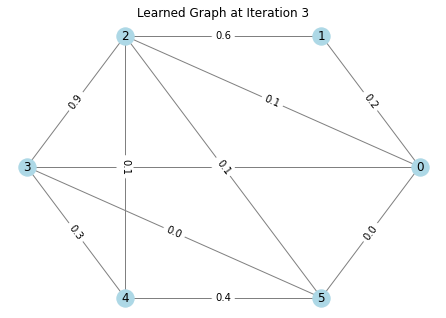

Iteration 4/5
after E-step: delta_W norm 0.0978, GLR 5.2154, adj norm^2 6.5578
after M-step-1: delta_W norm 0.0315, GLR 4.3919, adj norm^2 6.3443
PGD iter 1/100, ||S_new - S||_F = 0.2336
PGD iter 11/100, ||S_new - S||_F = 0.2272
PGD iter 21/100, ||S_new - S||_F = 0.1612
PGD iter 31/100, ||S_new - S||_F = 0.0373
PGD iter 41/100, ||S_new - S||_F = 0.0273
PGD iter 51/100, ||S_new - S||_F = 0.0177
PGD iter 61/100, ||S_new - S||_F = 0.0109
PGD iter 71/100, ||S_new - S||_F = 0.0073
PGD iter 81/100, ||S_new - S||_F = 0.0051
PGD iter 91/100, ||S_new - S||_F = 0.0035
tensor([[0.0000, 0.0130, 0.1641, 0.0000, 0.0231, 0.0000],
        [0.0130, 0.0000, 0.3102, -0.0000, 0.0000, 0.0000],
        [0.1641, 0.3102, 0.0000, 0.2943, -0.0000, 0.0000],
        [0.0000, -0.0000, 0.2943, 0.0000, 0.0768, 0.1221],
        [0.0231, 0.0000, -0.0000, 0.0768, 0.0000, 0.1259],
        [0.0000, 0.0000, 0.0000, 0.1221, 0.1259, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(5.4715, grad_fn=<PowBa

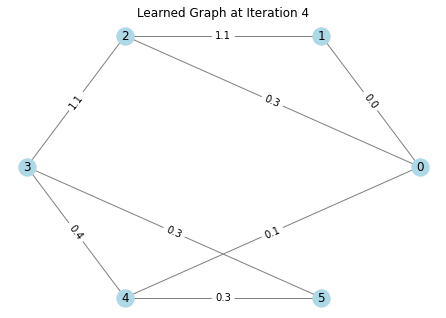

Iteration 5/5
after E-step: delta_W norm 0.0517, GLR 3.8207, adj norm^2 6.4383
after M-step-1: delta_W norm 0.0679, GLR 4.5630, adj norm^2 6.2487
PGD iter 1/100, ||S_new - S||_F = 0.2192
PGD iter 11/100, ||S_new - S||_F = 0.2136
PGD iter 21/100, ||S_new - S||_F = 0.1446
PGD iter 31/100, ||S_new - S||_F = 0.0619
PGD iter 41/100, ||S_new - S||_F = 0.0249
PGD iter 51/100, ||S_new - S||_F = 0.0115
PGD iter 61/100, ||S_new - S||_F = 0.0080
PGD iter 71/100, ||S_new - S||_F = 0.0057
PGD iter 81/100, ||S_new - S||_F = 0.0038
PGD iter 91/100, ||S_new - S||_F = 0.0024
tensor([[0.0000, 0.1284, 0.0000, 0.0108, 0.0000, 0.0465],
        [0.1284, 0.0000, 0.2819, 0.0498, -0.0000, 0.0000],
        [0.0000, 0.2819, 0.0000, 0.0520, 0.0000, 0.0178],
        [0.0108, 0.0498, 0.0520, 0.0000, 0.1446, 0.0335],
        [0.0000, -0.0000, 0.0000, 0.1446, 0.0000, 0.1546],
        [0.0465, 0.0000, 0.0178, 0.0335, 0.1546, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(3.3356, grad_fn=<PowBack

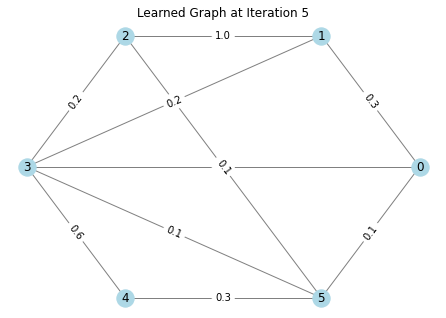

Final learned adjacency matrix:
tensor([[0.0000, 0.3144, 0.0000, 0.0226, 0.0000, 0.0590],
        [0.3144, 0.0000, 1.0018, 0.1800, -0.0000, 0.0000],
        [0.0000, 1.0018, 0.0000, 0.1741, 0.0000, 0.0542],
        [0.0226, 0.1800, 0.1741, 0.0000, 0.6255, 0.0751],
        [0.0000, -0.0000, 0.0000, 0.6255, 0.0000, 0.3144],
        [0.0590, 0.0000, 0.0542, 0.0751, 0.3144, 0.0000]],
       grad_fn=<MulBackward0>) tensor(3.3356, grad_fn=<PowBackward0>)


In [11]:
torch.manual_seed(42)
gem = GEM(num_nodes, mu=0.2, gamma=0.8, step_size=0.01, c=5, PGD_iters=100, scale=True)
# initialize adjacency and S
# adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
# run GEM
# with torch.no_grad():
    # draw_graph_from_adj(adj_init, title='Initial Graph')
x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
W_final = adj_final * S_final
print("Final learned adjacency matrix:")
print(W_final, W_final.norm()**2)

# 8-node graph


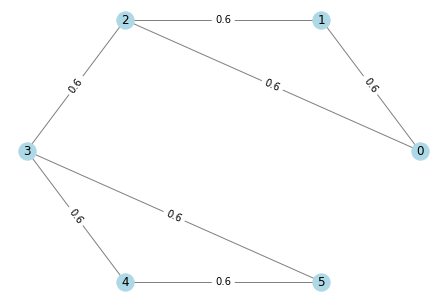

tensor(5.0400)
tensor([[ 1.2000, -0.6000, -0.6000, -0.0000, -0.0000, -0.0000],
        [-0.6000,  1.2000, -0.6000, -0.0000, -0.0000, -0.0000],
        [-0.6000, -0.6000,  1.8000, -0.6000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.6000,  1.8000, -0.6000, -0.6000],
        [-0.0000, -0.0000, -0.0000, -0.6000,  1.2000, -0.6000],
        [-0.0000, -0.0000, -0.0000, -0.6000, -0.6000,  1.2000]])
R_old tensor([[ 1.3241,  0.7685,  0.4907, -0.3426, -0.6204, -0.6204],
        [ 0.7685,  1.3241,  0.4907, -0.3426, -0.6204, -0.6204],
        [ 0.4907,  0.4907,  0.7685, -0.0648, -0.3426, -0.3426],
        [-0.3426, -0.3426, -0.0648,  0.7685,  0.4907,  0.4907],
        [-0.6204, -0.6204, -0.3426,  0.4907,  1.3241,  0.7685],
        [-0.6204, -0.6204, -0.3426,  0.4907,  0.7685,  1.3241]])
R tilde old tensor([[ 0.0000, -0.5556, -0.5556, -1.3889, -1.9444, -1.9444],
        [-0.5556,  0.0000, -0.5556, -1.3889, -1.9444, -1.9444],
        [-0.5556, -0.5556,  0.0000, -0.8333, -1.3889, -1.3889],
     

In [31]:
# test sherman morrison equality
# generate synthetic data
edges = [[0,1],[0,2],[1,2],[2,3],[3,4],[4,5],[3,5]]
edges = torch.tensor(edges)
weights = torch.tensor([0.6]*len(edges))
num_nodes = 6
adj = generate_graph_from_edges(num_nodes, edges, weights)
print(adj.norm()**2)
L = laplacian(adj, normed=False)
# print(L)
L_old = torch.Tensor(L)
print(L_old)
J = torch.ones(6,6) / 6
R_old = (L_old + J).inverse()
print('R_old', R_old)
R_tilde_old = R_old - (torch.diag(R_old).unsqueeze(1) + torch.diag(R_old).unsqueeze(0)) / 2
print('R tilde old', R_tilde_old)
# W = (- torch.Tensor(L)).fill_diagonal_(0)
# print(W)
# update edge (0,1) with +0.1 weight
u = torch.zeros(num_nodes)
u[0] = 1
u[1] = -1
v = torch.zeros(num_nodes)
v[0] = 1
v[1] = -1
delta = -0.1
L_new = L_old + delta * torch.ger(u, v)
print('L_new', L_new)
R_new = (L_new + J).inverse()
print('R_new', R_new)
R_tilde_new = R_new - (torch.diag(R_new).unsqueeze(1) + torch.diag(R_new).unsqueeze(0)) / 2
print('R tilde new', R_tilde_new)

# sherman
Q = torch.ger(R_tilde_old[0] - R_tilde_old[1], R_tilde_old[0] - R_tilde_old[1])
tilde_Q = Q - (torch.diag(Q).unsqueeze(0) + torch.diag(Q).unsqueeze(1)) / 2
R_new_sherman = R_old - (delta / (1 + delta * (R_old[0,0] + R_old[1,1] - 2 * R_old[0,1]))) * torch.ger(R_old[:,0] - R_old[:,1], R_old[0,:] - R_old[1,:])
print('R new sherman', R_new_sherman)   
print('Difference:', (R_new - R_new_sherman))
tilde_R_new_sherman = R_tilde_old - (delta / (1 - 2* delta * R_tilde_old[0,1])) * tilde_Q
print('R tilde new sherman', tilde_R_new_sherman)
print('Difference:', (R_tilde_new - tilde_R_new_sherman))
